In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")


In [3]:
print("Customers:")
print(customers.head())

print("\nProducts:")
print(products.head())

print("\nTransactions:")
print(transactions.head())

# Check data types and missing values
print("\nCustomers Info:")
print(customers.info())

print("\nProducts Info:")
print(products.info())

print("\nTransactions Info:")
print(transactions.info())

# Summary statistics
print("\nTransactions Summary:")
print(transactions.describe())


Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024

In [4]:
# Missing values check
print("\nMissing Values:")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())



Missing Values:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [5]:
# Fill missing product prices with median value
products['Price'] = products['Price'].fillna(products['Price'].median())

# Remove duplicates
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)


In [6]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


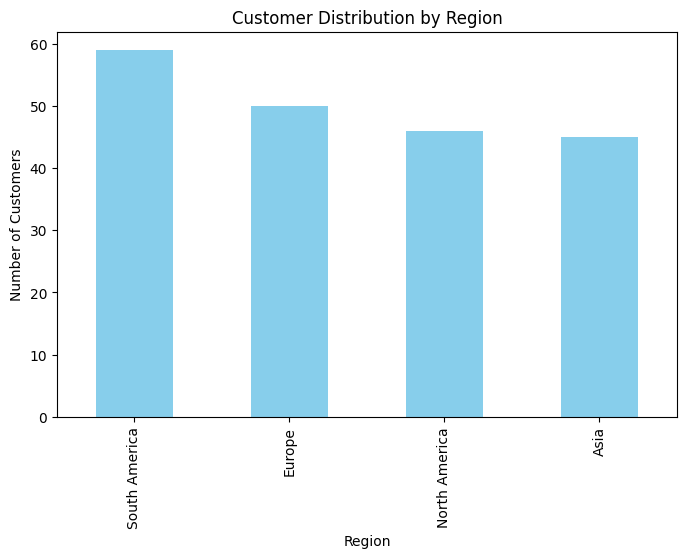

In [7]:
# Region-wise distribution of customers
customer_region_counts = customers['Region'].value_counts()
customer_region_counts.plot(kind='bar', title='Customer Distribution by Region', figsize=(8, 5), color='skyblue')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()


<ipython-input-9-fcabb2b5bffb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='coolwarm')


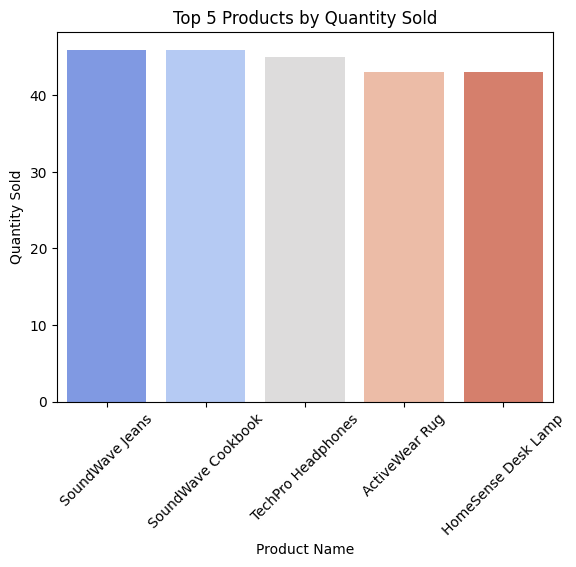

In [9]:
# Top 5 products by total transactions
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5).reset_index()

# Merge with the products dataset to get product details
top_products = top_products.merge(products, on='ProductID')

# Plot top products
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=top_products, x='ProductName', y='Quantity', palette='coolwarm')
plt.title('Top 5 Products by Quantity Sold')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')
plt.xlabel('Product Name')
plt.show()


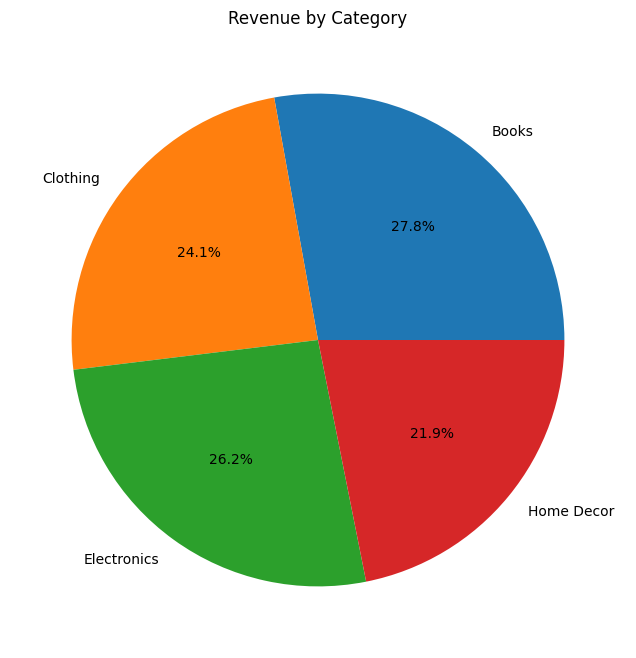

In [10]:
# Revenue by product category
category_revenue = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Revenue by Category')
plt.ylabel('')
plt.show()


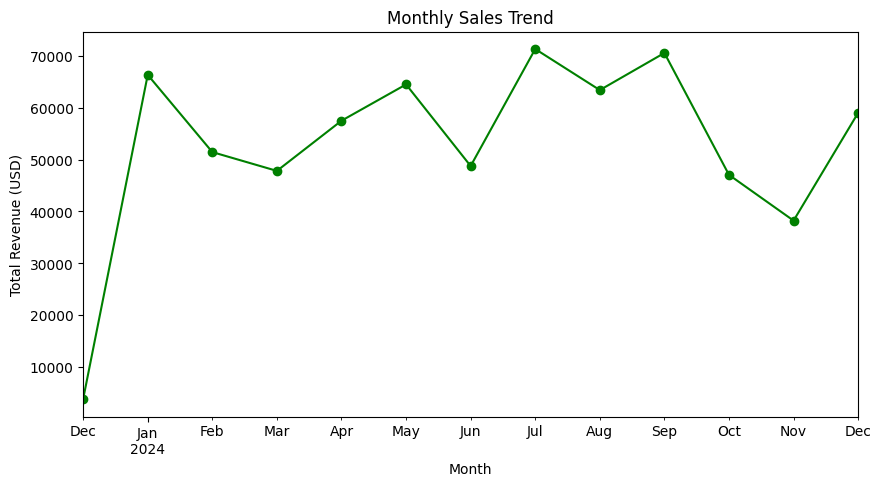

In [11]:
# Monthly transaction trends
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('Month')['TotalValue'].sum()

# Plot monthly sales trends
monthly_sales.plot(kind='line', marker='o', figsize=(10, 5), title='Monthly Sales Trend', color='green')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.show()


<ipython-input-12-c3af5187bd51>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='CustomerName', y='TotalValue', palette='viridis')


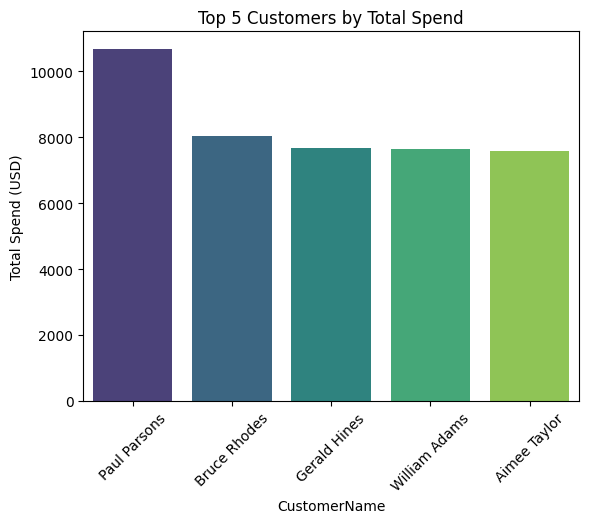

In [12]:
# Top 5 customers by total spend
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(5)

# Merge customer names
top_customers = top_customers.reset_index().merge(customers, on='CustomerID')

# Plot top customers
sns.barplot(data=top_customers, x='CustomerName', y='TotalValue', palette='viridis')
plt.title('Top 5 Customers by Total Spend')
plt.xticks(rotation=45)
plt.ylabel('Total Spend (USD)')
plt.show()
